In [1]:
########################## Imports ##########################
import os
import numpy as np
import tensorflow as tf
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPooling2D, MaxPool2D

In [2]:
########################## data preprocessing ###############
# Location to of dataset, this assumes that you read the readme and extracted the data
TRAIN_DATA_LOC = "./data/train"
TRAIN_SET_SIZE = 25000
TEST_DATA_LOC = "./data/test"

# Make sure that our dataset has been correctly extracted.
assert Path(TRAIN_DATA_LOC).exists() == True, "Train data is not in expected path, please verify. dataset extraction."
assert Path(TEST_DATA_LOC).exists() == True, "Test data is not in expected path, please verify dataset extraction."

files = os.listdir(TRAIN_DATA_LOC)
binary_labels = []
named_labels = []
# parse the files, and split label types between cats and dogs
for file in files:
    animal_type = file.split('.')[0]

    if animal_type == "cat":
        binary_labels.append(0)
        named_labels.append('cat')
    else:
        binary_labels.append(1)
        named_labels.append('dog')

# Verify that we have 25000 labels
print(len(binary_labels))
assert len(binary_labels) == TRAIN_SET_SIZE

print(len(named_labels))
assert len(named_labels) == TRAIN_SET_SIZE

# Combine the filename and label type
binary_data_set = pd.DataFrame({'filename':files,
                                'label':binary_labels})

named_data_set = pd.DataFrame({'filename':files,
                                'label':named_labels})    

25000
25000


In [3]:
################### Create our training & validation set #####

train_data_set, validation_data_set = train_test_split(named_data_set, test_size=0.10, random_state=69)
train_data_set.reset_index(drop=True, inplace=True)
validation_data_set.reset_index(drop=True, inplace=True)

assert train_data_set.shape[0] == (TRAIN_SET_SIZE * 0.9), "80/20 split error"
assert validation_data_set.shape[0] == (TRAIN_SET_SIZE * 0.1), "80/20 split error"

In [4]:
###################### Create our image gen objects #########
'''
    Generate batches of tensor image data with real-time data augmentation.
    https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
'''

image_size = (150, 150)

train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_dataframe(train_data_set,
                                                    TRAIN_DATA_LOC,
                                                    x_col='filename',
                                                    y_col='label', 
                                                    target_size=image_size,
                                                    class_mode='categorical',
                                                    batch_size = 32)

validation_datagen = ImageDataGenerator(rescale=1/255)
validation_generator = validation_datagen.flow_from_dataframe(validation_data_set, 
                                                              TRAIN_DATA_LOC, 
                                                              x_col = 'filename',
                                                              y_col = 'label',
                                                              target_size = image_size,
                                                              class_mode = 'categorical',
                                                              batch_size = 32)

Found 22500 validated image filenames belonging to 2 classes.
Found 2500 validated image filenames belonging to 2 classes.


In [5]:
'''
    Visual Geometry Group: The standard deep Convolutional Neural Network (CNN) architecture.
    VGG16 Architecture: https://viso.ai/deep-learning/vgg-very-deep-convolutional-networks/
'''

# Start a model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Flatten, Dropout

# VGG16 Architecture: https://viso.ai/deep-learning/vgg-very-deep-convolutional-networks/

model_vgg = Sequential()
model_vgg.add(Conv2D(64, (3,3), padding='same', activation='relu',kernel_initializer='he_normal',input_shape=(150, 150, 3)))
model_vgg.add(Conv2D(64, (3,3), padding='same', activation='relu',kernel_initializer='he_normal'))
model_vgg.add(MaxPool2D((2,2)))

model_vgg.add(Conv2D(128, (3,3), padding='same', activation='relu',kernel_initializer='he_normal'))
model_vgg.add(Conv2D(128, (3,3), padding='same', activation='relu',kernel_initializer='he_normal'))
model_vgg.add(MaxPool2D((2,2)))

model_vgg.add(Conv2D(256, (3,3), padding='same', activation='relu',kernel_initializer='he_normal'))
model_vgg.add(Conv2D(256, (3,3), padding='same', activation='relu',kernel_initializer='he_normal'))
model_vgg.add(Conv2D(256, (3,3), padding='same', activation='relu',kernel_initializer='he_normal'))
model_vgg.add(MaxPool2D((2,2)))

model_vgg.add(Conv2D(512, (3,3), padding='same', activation='relu',kernel_initializer='he_normal'))
model_vgg.add(Conv2D(512, (3,3), padding='same', activation='relu',kernel_initializer='he_normal'))
model_vgg.add(Conv2D(512, (3,3), padding='same', activation='relu',kernel_initializer='he_normal'))
model_vgg.add(MaxPool2D((2,2)))

model_vgg.add(Conv2D(512, (3,3), padding='same', activation='relu',kernel_initializer='he_normal'))
model_vgg.add(Conv2D(512, (3,3), padding='same', activation='relu',kernel_initializer='he_normal'))
model_vgg.add(Conv2D(512, (3,3), padding='same', activation='relu',kernel_initializer='he_normal'))
model_vgg.add(MaxPool2D((2,2)))

model_vgg.add(Flatten())
model_vgg.add(Dense(units=4096, activation='relu'))
model_vgg.add(Dropout(0.5))
model_vgg.add(Dense(units=4096, activation='relu'))
model_vgg.add(Dropout(0.5))
model_vgg.add(Dense(units=2, activation='softmax'))

model_vgg.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.01),
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

model_vgg.summary()

################ Model is too complex maybe, let's simplify

# Start a model
model_simp = Sequential()

# First Convolution layer
model_simp.add(Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model_simp.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolution layer
model_simp.add(Conv2D(64, (3, 3),activation='relu'))
model_simp.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolution layer
model_simp.add(Conv2D(128, (3, 3),activation='relu'))
model_simp.add(MaxPooling2D(pool_size=(2, 2)))

# Neural Network One hidden
model_simp.add(Flatten())
model_simp.add(Dense(512, activation='relu'))
model_simp.add(Dropout(0.5))
model_simp.add(Dense(2, activation='softmax'))
model_simp.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=['accuracy'])

model_simp.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 37, 37, 256)       2

In [6]:
"""
    https://towardsdatascience.com/step-by-step-vgg16-implementation-in-keras-for-beginners-a833c686ae6c
"""
model_history_vgg = model_vgg.fit(
    train_generator,
    epochs=20,
    batch_size=128,
    verbose=1,
    callbacks = None,
    validation_data=validation_generator
)

Epoch 1/20
704/704 [==============================] - 1941s 3s/step - loss: 0.6912 - accuracy: 0.5670 - val_loss: 0.6292 - val_accuracy: 0.6440
Epoch 2/20
704/704 [==============================] - 1977s 3s/step - loss: 0.6126 - accuracy: 0.6582 - val_loss: 0.5772 - val_accuracy: 0.7016
Epoch 3/20
704/704 [==============================] - 1995s 3s/step - loss: 0.5433 - accuracy: 0.7222 - val_loss: 0.4766 - val_accuracy: 0.7788
Epoch 4/20
704/704 [==============================] - 1999s 3s/step - loss: 0.4862 - accuracy: 0.7643 - val_loss: 0.4419 - val_accuracy: 0.7936
Epoch 5/20
704/704 [==============================] - 1993s 3s/step - loss: 0.4245 - accuracy: 0.8048 - val_loss: 0.4067 - val_accuracy: 0.8272
Epoch 6/20
704/704 [==============================] - 1989s 3s/step - loss: 0.3727 - accuracy: 0.8346 - val_loss: 0.3431 - val_accuracy: 0.8408
Epoch 7/20
704/704 [==============================] - 1997s 3s/step - loss: 0.3227 - accuracy: 0.8589 - val_loss: 0.3573 - val_accuracy:

In [7]:
"""
    https://towardsdatascience.com/step-by-step-vgg16-implementation-in-keras-for-beginners-a833c686ae6c
"""
model_history = model_simp.fit(
    train_generator,
    epochs=40,
    batch_size=128,
    verbose=1,
    callbacks = None,
    validation_data=validation_generator
)

Epoch 1/40
704/704 [==============================] - 184s 261ms/step - loss: 0.6371 - accuracy: 0.6826 - val_loss: 0.5243 - val_accuracy: 0.7440
Epoch 2/40
704/704 [==============================] - 184s 262ms/step - loss: 0.4782 - accuracy: 0.7778 - val_loss: 0.4557 - val_accuracy: 0.7840
Epoch 3/40
704/704 [==============================] - 185s 263ms/step - loss: 0.4281 - accuracy: 0.8103 - val_loss: 0.5316 - val_accuracy: 0.7684
Epoch 4/40
704/704 [==============================] - 188s 267ms/step - loss: 0.3852 - accuracy: 0.8342 - val_loss: 0.3857 - val_accuracy: 0.8276
Epoch 5/40
704/704 [==============================] - 191s 271ms/step - loss: 0.3621 - accuracy: 0.8483 - val_loss: 0.3604 - val_accuracy: 0.8432
Epoch 6/40
704/704 [==============================] - 186s 264ms/step - loss: 0.3328 - accuracy: 0.8620 - val_loss: 0.3898 - val_accuracy: 0.8364
Epoch 7/40
704/704 [==============================] - 187s 265ms/step - loss: 0.3173 - accuracy: 0.8725 - val_loss: 0.3621 -

In [8]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

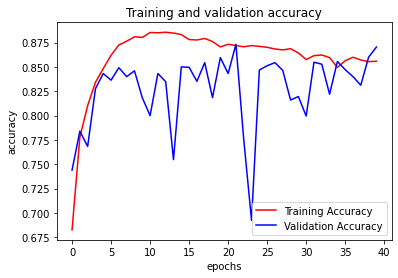

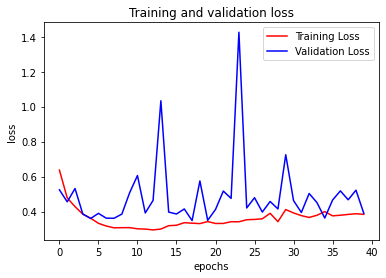

In [9]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(len(acc)) 

# plot accuracy
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(["Training Accuracy","Validation Accuracy"])
plt.show()

# plot loss
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(["Training Loss","Validation Loss"])
plt.show()

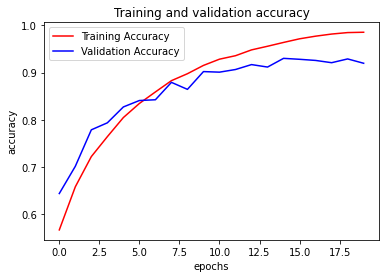

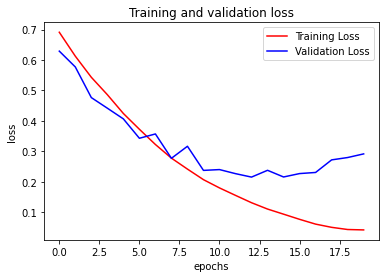

In [10]:
# VGG16 Model
acc = model_history_vgg.history['accuracy']
val_acc = model_history_vgg.history['val_accuracy']
loss = model_history_vgg.history['loss']
val_loss = model_history_vgg.history['val_loss']
epochs = range(len(acc)) # Get number of epochs

# plot accuracy
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(["Training Accuracy","Validation Accuracy"])
plt.show()

# plot loss
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(["Training Loss","Validation Loss"])
plt.show()

In [11]:
model_simp.save("cats_vs_dog_CNN_simple_85.h5")

model_vgg.save("cats_vs_dog_CNN_VGG_98.h5")

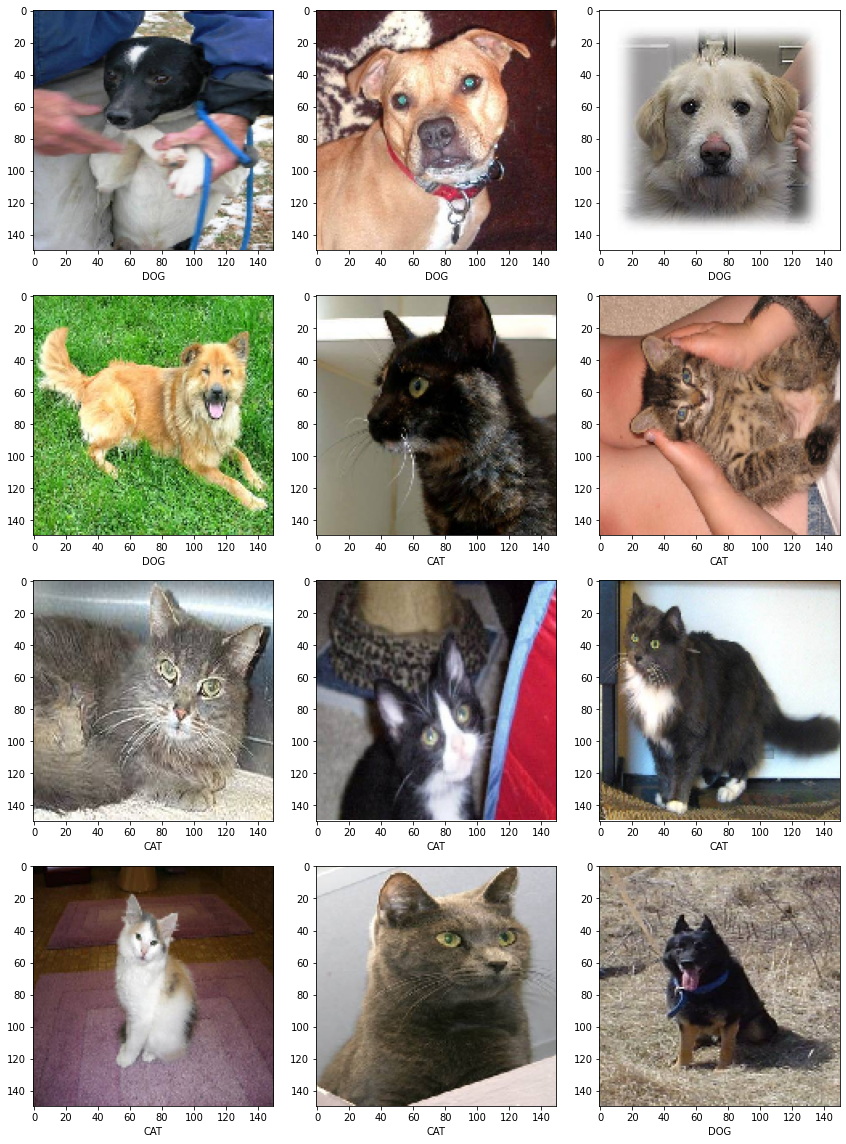

In [49]:
from keras.preprocessing.image import load_img
from PIL import Image

category = { 0:'CAT', 1:'DOG' }


plt.figure(figsize=(12, 16))
for i in range(1, 13):

    im = Image.open("./data/test/{}.jpg".format(i))
    im = im.resize((150, 150))
    im = np.expand_dims(im,axis=0)
    im = np.array(im)
    im= im/255

    filename = "{}.jpg".format(i)
    pred = model_vgg.predict([im])[0]
    img = load_img("./data/test/{}".format(filename), target_size=(150, 150))
    plt.subplot(4, 3, i)
    plt.imshow(img)
    plt.xlabel( "{}".format(category[np.argmax(pred)]))

plt.tight_layout()
plt.show()

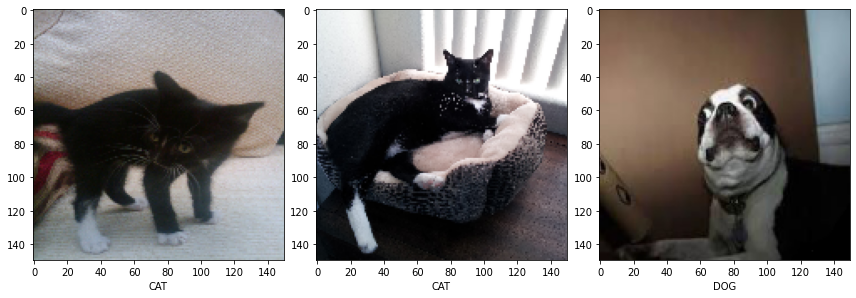

In [59]:
RANDOM_FILES = './data/random'
internet_files = os.listdir(RANDOM_FILES)
plt.figure(figsize=(12, 16))

for i, file in enumerate(internet_files):

    # Predict the image
    im = Image.open("./data/random/{}".format(file))
    im = im.resize((150, 150))
    im = np.expand_dims(im,axis=0)
    im = np.array(im)
    im= im/255
    pred = model_vgg.predict([im])[0]
    
    img = load_img("./data/random/{}".format(file), target_size=(150, 150))
    plt.subplot(4, 3, i + 1)
    plt.imshow(img)
    plt.xlabel( "{}".format(category[np.argmax(pred)]))

plt.tight_layout()
plt.show()